In [79]:
# from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image as img
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster

In [48]:
# pic = Image.open("dogs.jpeg")
# pix = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3)


# im = Image.open('dogs.jpeg')
# im2arr = np.array(im) # im2arr.shape: height x width x channel
# arr2im = Image.fromarray(im2arr)

In [49]:
image = img.imread('dogs.jpeg')
image.shape

(185, 272, 3)

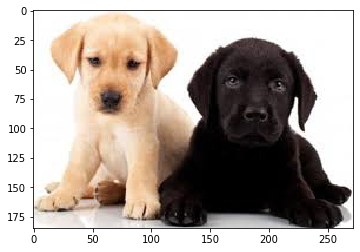

In [50]:
plt.imshow(image)

In [51]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

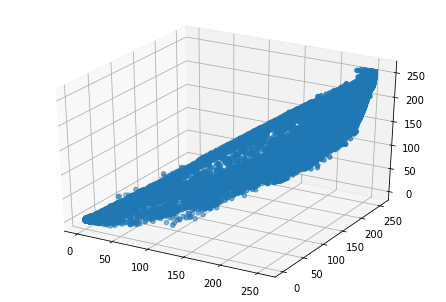

In [52]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [53]:
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [62]:
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])


In [67]:
df.head(7)

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,240,240,240,2.321122,2.407630,2.358150
1,255,255,255,2.466192,2.558107,2.505534
2,255,255,255,2.466192,2.558107,2.505534
3,251,251,251,2.427507,2.517979,2.466231
4,255,255,255,2.466192,2.558107,2.505534
5,255,255,255,2.466192,2.558107,2.505534
6,253,253,253,2.446849,2.538043,2.485883


In [68]:
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 3)

In [72]:
cluster_centers

array([[2.43857146, 2.44987659, 2.46625241],
       [0.29359525, 0.21835642, 0.21034017],
       [2.06759042, 1.75826893, 1.48693503]])

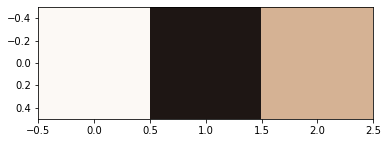

In [71]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255,scaled_g * g_std / 255,scaled_b * b_std / 255))
    
plt.imshow([colors])
plt.show()

###### Another Method

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


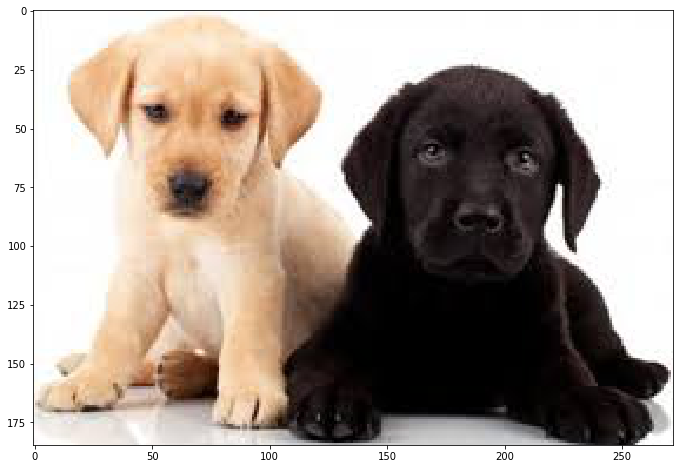

In [80]:
image = ndimage.imread("dogs.jpeg")
plt.figure(figsize = (15,8))
plt.imshow(image)

In [81]:
image.shape

(185, 272, 3)

In [130]:
x, y, z = image.shape
image_2d = image.reshape(x*y, z)
image_2d.shape

(50320, 3)

In [135]:
kmeans_cluster = cluster.KMeans(n_clusters=3)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

In [136]:
cluster_centers

array([[251.46389001, 247.64051168, 243.09528606],
       [ 29.49800383,  21.57183484,  20.46825267],
       [210.57385664, 174.74168651, 143.60727482]])

In [137]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

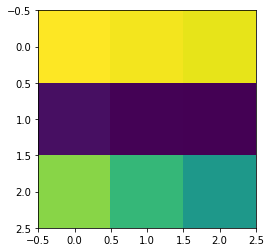

In [141]:
plt.imshow(cluster_centers)

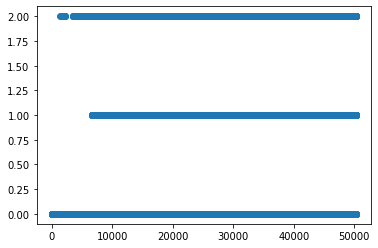

In [147]:
plt.plot(cluster_labels, 'o')